# Q1

In [142]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, SimpleRNN, GRU
import datetime
import matplotlib.pyplot as plt
# from tensorflow.keras.optimizers import RMSprop

## Reading Dataset

In [143]:
AAPL = pd.read_csv('AAPL.csv', sep='\t')
GOOG = pd.read_csv('GOOG.csv', sep='\t')

In [144]:
AAPL

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.601469
1,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.647457
2,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.223597
3,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.175119
4,2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.349140
...,...,...,...,...,...,...,...
2259,2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,144.656540
2260,2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,154.843475
2261,2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,153.838562
2262,2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,153.917389


In [145]:
GOOG

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,313.579620,310.954468,312.304413,312.204773,3927000.0,312.204773
1,2010-01-05,312.747742,309.609497,312.418976,310.829926,6031900.0,310.829926
2,2010-01-06,311.761444,302.047852,311.761444,302.994293,7987100.0,302.994293
3,2010-01-07,303.861053,295.218445,303.562164,295.940735,12876600.0,295.940735
4,2010-01-08,300.498657,293.455048,294.894653,299.885956,9483900.0,299.885956
...,...,...,...,...,...,...,...
2259,2018-12-24,1003.539978,970.109985,973.900024,976.219971,1590300.0,976.219971
2260,2018-12-26,1040.000000,983.000000,989.010010,1039.459961,2373300.0,1039.459961
2261,2018-12-27,1043.890015,997.000000,1017.150024,1043.880005,2109800.0,1043.880005
2262,2018-12-28,1055.560059,1033.099976,1049.619995,1037.079956,1414800.0,1037.079956


## Preprocessing

In [146]:
AAPL_y = AAPL['Close']
GOOG_y = GOOG['Close']
AAPL.drop('Date', axis=1, inplace=True)
GOOG.drop('Date', axis=1, inplace=True)
AAPL.drop('Close', axis=1, inplace=True)
GOOG.drop('Close', axis=1, inplace=True)

#Normalizing
AAPL = (AAPL-AAPL.min())/(AAPL.max()-AAPL.min())
GOOG = (GOOG-GOOG.min())/(GOOG.max()-GOOG.min())
AAPL_y = (AAPL_y-AAPL_y.min())/(AAPL_y.max()-AAPL_y.min())
GOOG_y = (GOOG_y-GOOG_y.min())/(GOOG_y.max()-GOOG_y.min())

In [147]:
num_of_rows = len(AAPL)
time_series_length = 30
inputs = []
outputs = []
for i in range(num_of_rows-time_series_length-1):
  new_input = []
  new_output = []
  for j in range(time_series_length):
    new_input_data = []
    lst = AAPL.columns.values
    for title in lst:
      new_input_data.append(AAPL[title][i+j])
    lst = GOOG.columns.values
    for title in lst:
      new_input_data.append(GOOG[title][i+j])
    new_input.append(new_input_data)

    if j == 29:
      new_output = []
      new_output.append(AAPL_y[i+j+1])
      new_output.append(GOOG_y[i+j+1])

  inputs.append(new_input)
  outputs.append(new_output)

inputs = np.array(inputs)
print('Inputs Shape:', inputs.shape)
outputs = np.array(outputs)
print('Outputs Shape:', outputs.shape)

Inputs Shape: (2233, 30, 10)
Outputs Shape: (2233, 2)


##### Splitting data

In [148]:
test_x = inputs[int(0.85*outputs.shape[0]):]
test_y = outputs[int(0.85*outputs.shape[0]):]
train_x = inputs[:int(0.85*outputs.shape[0])]
train_y = outputs[:int(0.85*outputs.shape[0])]

## Creating Model, Fitting and Getting Results

### LSTM

In [149]:
model = Sequential()
model.add(LSTM(64, input_shape = (time_series_length, inputs.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'linear'))

my_optimizer = 'RMSprop'
my_loss = 'mse'
model.compile(loss = my_loss, optimizer = my_optimizer, metrics = ['mse','mae'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                19200     
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 2)                 130       
                                                                 
Total params: 19,330
Trainable params: 19,330
Non-trainable params: 0
_________________________________________________________________


In [150]:
start = datetime.datetime.now()
trainedModel = model.fit(train_x, train_y, batch_size = 64, epochs = 60, validation_split = 0.2)
end = datetime.datetime.now()

Epoch 1/60
24/24 [==============================] - 2s 25ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0520 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0572
Epoch 2/60
24/24 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0348 - val_loss: 0.0023 - val_mse: 0.0023 - val_mae: 0.0393
Epoch 3/60
24/24 [==============================] - 0s 7ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0315 - val_loss: 4.2036e-04 - val_mse: 4.2036e-04 - val_mae: 0.0165
Epoch 4/60
24/24 [==============================] - 0s 7ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0274 - val_loss: 0.0023 - val_mse: 0.0023 - val_mae: 0.0440
Epoch 5/60
24/24 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0268 - val_loss: 0.0075 - val_mse: 0.0075 - val_mae: 0.0830
Epoch 6/60
24/24 [==============================] - 0s 7ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0236 - val_loss: 7.0082e-04 - val_mse: 7.0082e-04 - val_mae: 0.0217
Epoch 7/60


In [151]:
print('Training Duration: ', end-start)

Training Duration:  0:00:22.154512


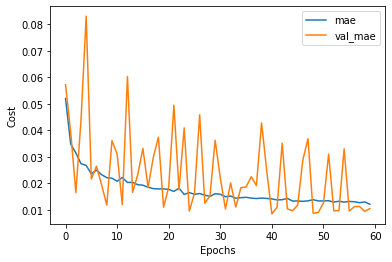

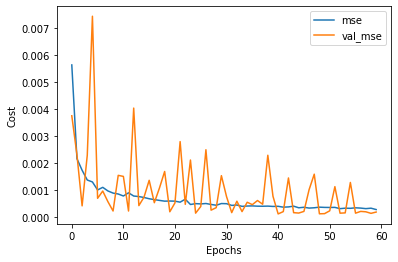

In [152]:
history = trainedModel.history
mae = history['mae']
val_mae = history['val_mae']
mse = history['mse']
val_mse = history['val_mse']

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(mae)
plt.plot(val_mae)
plt.legend(['mae','val_mae'])
plt.figure()

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(mse)
plt.plot(val_mse)
plt.legend(['mse','val_mse'])

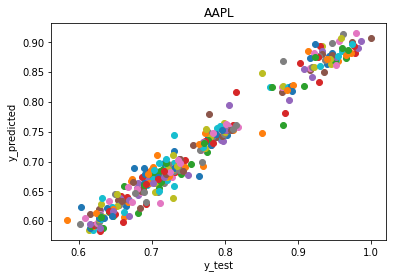

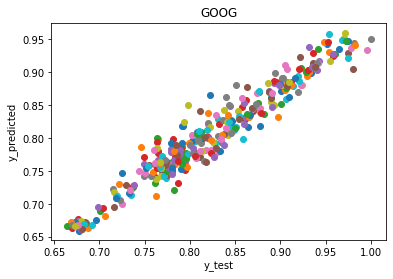

In [153]:
#plotting predicted vs real
pred_y = model.predict(test_x)
plt.title('AAPL')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
for i in range(len(pred_y)):
  plt.scatter(test_y[i][0], pred_y[i][0])
plt.show()

plt.title('GOOG')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
for i in range(len(pred_y)):
  plt.scatter(test_y[i][1], pred_y[i][1])

### RNN

In [154]:
model = Sequential()
model.add(SimpleRNN(64, input_shape = (time_series_length, inputs.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'linear'))

model.compile(loss = my_loss, optimizer = my_optimizer, metrics = ['mse','mae'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 64)                4800      
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 2)                 130       
                                                                 
Total params: 4,930
Trainable params: 4,930
Non-trainable params: 0
_________________________________________________________________


In [155]:
start = datetime.datetime.now()
trainedModel = model.fit(train_x, train_y, batch_size = 64, epochs = 60, validation_split = 0.2)
end = datetime.datetime.now()

Epoch 1/60
24/24 [==============================] - 2s 31ms/step - loss: 0.0560 - mse: 0.0560 - mae: 0.1737 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.1462
Epoch 2/60
24/24 [==============================] - 1s 25ms/step - loss: 0.0195 - mse: 0.0195 - mae: 0.1093 - val_loss: 0.0370 - val_mse: 0.0370 - val_mae: 0.1744
Epoch 3/60
24/24 [==============================] - 1s 26ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0865 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0656
Epoch 4/60
24/24 [==============================] - 1s 26ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0714 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0365
Epoch 5/60
24/24 [==============================] - 1s 23ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0618 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0955
Epoch 6/60
24/24 [==============================] - 1s 25ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0553 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0576
Epoch 7/60
24/24 [====

In [156]:
print('Training Duration: ', end-start)

Training Duration:  0:00:41.751720


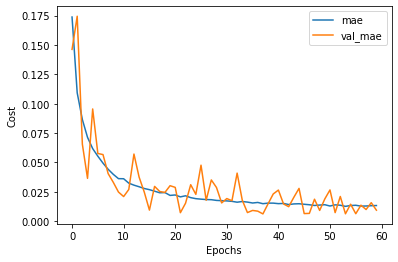

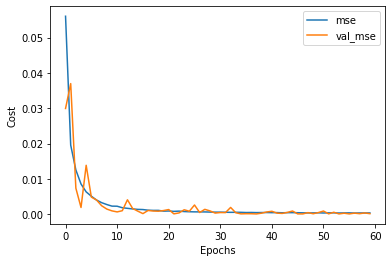

In [157]:
history = trainedModel.history
mae = history['mae']
val_mae = history['val_mae']
mse = history['mse']
val_mse = history['val_mse']

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(mae)
plt.plot(val_mae)
plt.legend(['mae','val_mae'])
plt.figure()

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(mse)
plt.plot(val_mse)
plt.legend(['mse','val_mse'])

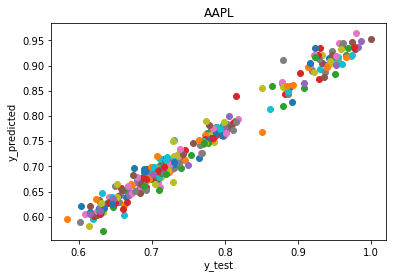

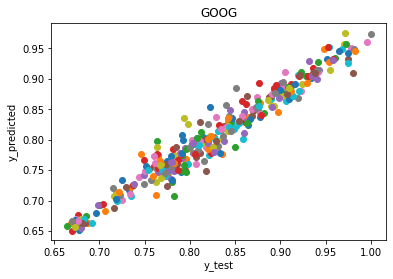

In [158]:
#plotting predicted vs real
pred_y = model.predict(test_x)
plt.title('AAPL')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
for i in range(len(pred_y)):
  plt.scatter(test_y[i][0], pred_y[i][0])
plt.show()

plt.title('GOOG')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
for i in range(len(pred_y)):
  plt.scatter(test_y[i][1], pred_y[i][1])

### GRU

In [159]:
model = Sequential()
model.add(GRU(64, input_shape = (time_series_length, inputs.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'linear'))

model.compile(loss = my_loss, optimizer = my_optimizer, metrics = ['mse','mae'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 64)                14592     
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 2)                 130       
                                                                 
Total params: 14,722
Trainable params: 14,722
Non-trainable params: 0
_________________________________________________________________


In [160]:
start = datetime.datetime.now()
trainedModel = model.fit(train_x, train_y, batch_size = 64, epochs = 60, validation_split = 0.2)
end = datetime.datetime.now()

Epoch 1/60
24/24 [==============================] - 2s 22ms/step - loss: 0.0090 - mse: 0.0090 - mae: 0.0645 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0327
Epoch 2/60
24/24 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0350 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0439
Epoch 3/60
24/24 [==============================] - 0s 6ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0318 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0326
Epoch 4/60
24/24 [==============================] - 0s 7ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0281 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0323
Epoch 5/60
24/24 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0256 - val_loss: 5.7062e-04 - val_mse: 5.7062e-04 - val_mae: 0.0205
Epoch 6/60
24/24 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0241 - val_loss: 5.2297e-04 - val_mse: 5.2297e-04 - val_mae: 0.0191
Epoch 7/60


In [161]:
print('Training Duration: ', end-start)

Training Duration:  0:00:21.995696


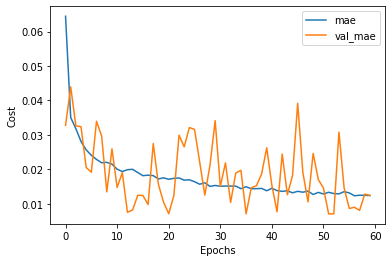

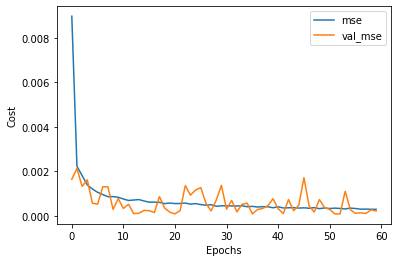

In [162]:
history = trainedModel.history
mae = history['mae']
val_mae = history['val_mae']
mse = history['mse']
val_mse = history['val_mse']

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(mae)
plt.plot(val_mae)
plt.legend(['mae','val_mae'])
plt.figure()

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(mse)
plt.plot(val_mse)
plt.legend(['mse','val_mse'])

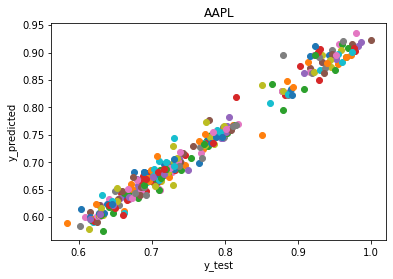

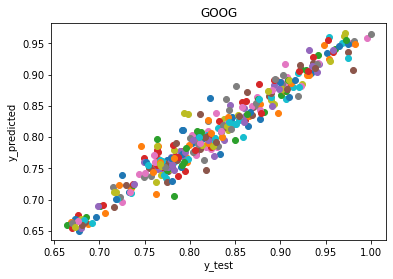

In [163]:
#plotting predicted vs real
pred_y = model.predict(test_x)
plt.title('AAPL')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
for i in range(len(pred_y)):
  plt.scatter(test_y[i][0], pred_y[i][0])
plt.show()

plt.title('GOOG')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
for i in range(len(pred_y)):
  plt.scatter(test_y[i][1], pred_y[i][1])